# Trabajo Práctico Nº 1
## Objetivos

- Implementar y analizar el filtro de promedio móvil (moving average) en Python.
- Aplicar el concepto de convolución en señales digitales.
- Familiarizarse con el entorno de desarrollo en Python notebooks.
- Comparar representación en punto flotante vs punto fijo, evaluando precisión y tiempos de cómputo.

# Ejercicio 1 - Filtro Moving Average

1. Implementá un algoritmo de promedio móvil (moving average) según la definición vista en clase, que reciba como parámetros:

- La señal de entrada.
- El tamaño de la ventana.

A partir de tu implementación, obtené y graficá la respuesta impulsiva del sistema (lo que en clase llamamos su “firma” o función de transferencia).

2. Respondé:

- ¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?

  La respuesta impulsiva de un sistema se obtiene aplicando una señal impulso unitaria como entrada y observando como se comporta la salida. La respuesta    impulsiva caracteriza completamente a un sistema lineal e invariante en el tiempo.
- ¿Qué representa en el caso del filtro de promedio móvil?

  La respuesta impulsiva del filtro promedio movil representa una ventana rectangular que define como se combinan los ultimos valores de la señal de entrada.

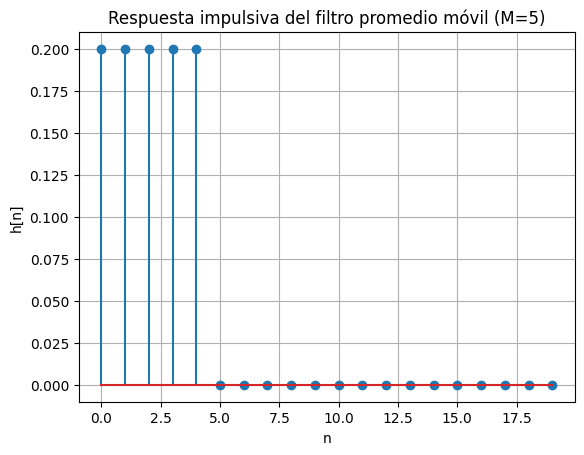

In [1]:
import matplotlib.pyplot as plt

# --- Implementación del promedio móvil ---
def promedio_movil(señal, M):
    N = len(señal)
    salida = [0.0] * N
    
    for n in range(N):
        suma = 0.0
        for k in range(M):
            if n - k >= 0:   # Solo sumamos si hay valores disponibles
                suma += señal[n - k]
        salida[n] = suma / M   # Se divide siempre por M (ventana fija)
    return salida


# --- Generar un impulso unitario ---
M = 5                 # Tamaño de la ventana del promedio
N = 20                # Cantidad de muestras para observar la respuesta
impulso = [0]*N
impulso[0] = 1        # δ[n] = 1 en n=0, 0 en el resto

# --- Obtener la respuesta impulsiva ---
h = promedio_movil(impulso, M)

# --- Graficar ---
plt.stem(range(N), h)   
plt.title(f"Respuesta impulsiva del filtro promedio móvil (M={M})")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

# Ejercicio 2 - Respuesta del sistema

1. Genera dos señales de prueba:
    - Una onda cuadrada de amplitud 1 y frecuencia de 2 kHz.
    - Una onda triangular de amplitud 1 y frecuencia de 1 kHz.

Aplica el moving average implementado en el Ejercicio 1 a estas señales.

2. Analiza los resultados:

    - Grafica la señal original y la señal filtrada.
    - Explica qué cambios observas en la forma de onda.

3. Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?


   El promedio movil actua como filtro pasa bajos, para M suficientemente grande la señal se parece mas a la senoidal fundamental.

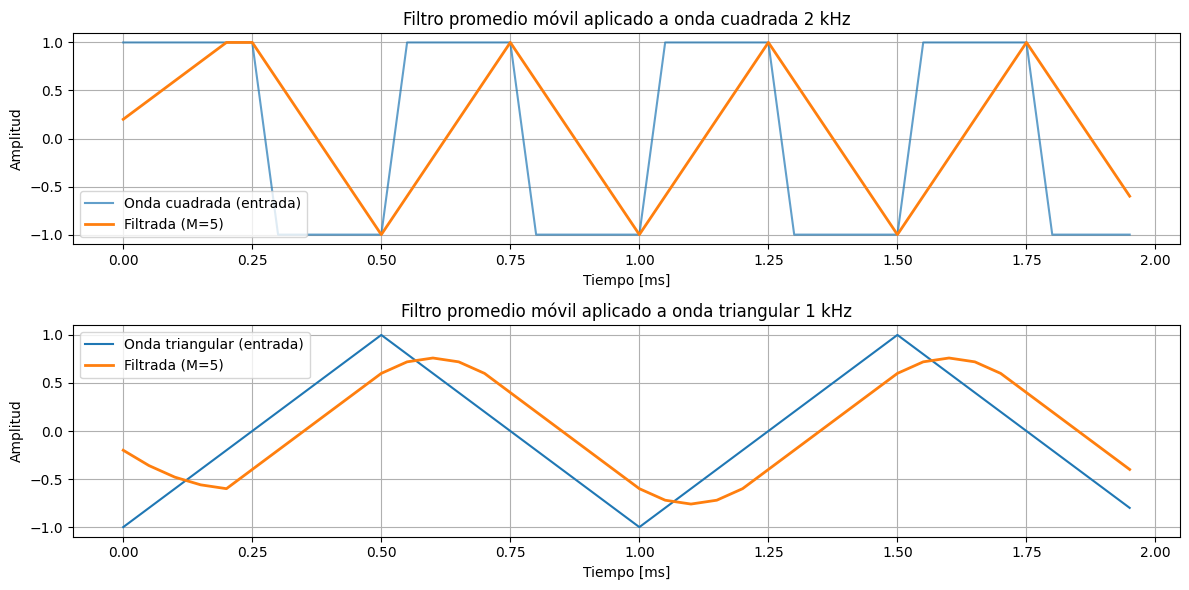

In [2]:
import matplotlib.pyplot as plt
import numpy as np  # Solo para la parte gráfica y coseno, no para el filtro

# --- Implementación del promedio móvil ---
def promedio_movil(señal, M):
    N = len(señal)
    salida = [0.0] * N
    for n in range(N):
        suma = 0.0
        for k in range(M):
            if n - k >= 0:
                suma += señal[n - k]
        salida[n] = suma / M
    return salida


# --- Parámetros de muestreo ---
fs = 20000        # Frecuencia de muestreo (20 kHz)
T = 2e-3          # Duración de la simulación (2 ms)
t = np.arange(0, T, 1/fs)
N = len(t)

# --- Señal 1: Onda cuadrada (2 kHz, amplitud 1) ---
f1 = 2000
onda_cuadrada = [1 if np.sin(2*np.pi*f1*ti) >= 0 else -1 for ti in t]

# --- Señal 2: Onda triangular (1 kHz, amplitud 1) ---
f2 = 1000
onda_triangular = []
for ti in t:
    # Fórmula de onda triangular normalizada
    value = 2 * abs(2 * (ti*f2 - np.floor(ti*f2 + 0.5))) - 1
    onda_triangular.append(value)

# --- Aplicar filtro promedio móvil ---
M = 5   # Tamaño de la ventana
cuadrada_filtrada = promedio_movil(onda_cuadrada, M)
triangular_filtrada = promedio_movil(onda_triangular, M)

# --- Graficar resultados ---
plt.figure(figsize=(12,6))

# Señal cuadrada
plt.subplot(2,1,1)
plt.plot(t*1000, onda_cuadrada, label="Onda cuadrada (entrada)", alpha=0.7)
plt.plot(t*1000, cuadrada_filtrada, label="Filtrada (M=5)", linewidth=2)
plt.title("Filtro promedio móvil aplicado a onda cuadrada 2 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Señal triangular
plt.subplot(2,1,2)
plt.plot(t*1000, onda_triangular, label="Onda triangular (entrada)", alpha=1)
plt.plot(t*1000, triangular_filtrada, label="Filtrada (M=5)", linewidth=2)
plt.title("Filtro promedio móvil aplicado a onda triangular 1 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ejercicio 3 - Convolución en punto flotante y punto fijo

1. Implementa un algoritmo de convolución:

    - En punto flotante (float).
    - En punto fijo, utilizando por ejemplo la librería fixedpoint.

2. Compara los resultados con la función de NumPy np.convolve. Mide y compara:

    - El tiempo de ejecución usando timeit.
    - El error de la salida respecto al cálculo en punto flotante.

3. Conclusión:

    - ¿Qué diferencias observas entre las implementaciones?
      
      La convolución en punto flotante y NumPy coinciden casi exactamente.
      La convolución en punto fijo introduce un pequeño error debido a la representación limitada de los números.
      investigando un poco el porque el punto fijo es mas lento que el punto flotante se concluye:
                El punto flotante (float) en Python se ejecuta directamente sobre el FPU del procesador (o en C interno de NumPy).
                El punto fijo en Python es una simulación software pura. Por eso, en Python puro siempre va a ser más lento que float, salvo que uses hardware                   embebido o C optimizado.
    - ¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?
      
      Usar punto flotante consume menos memoria en sistemas embebidos, puede ser mas rapido en harware sin FPU.
      La desventaja es menor rango dinamico, precision limitada, mayor complejidad en el codigo.

In [4]:
import numpy as np
from fixedpoint import FixedPoint
import timeit

# Señales de prueba
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=float)
h = np.array([1.0, -1.0, 0.5], dtype=float)

def conv_float(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1, dtype=float)
    for n in range(N + M - 1):
        for k in range(M):
            if n - k >= 0 and n - k < N:
                y[n] += x[n - k] * h[k]
    return y

# Test
y_float = conv_float(x, h)
y_numpy = np.convolve(x, h)
print("Convolución punto flotante:", y_float)
print("Convolución NumPy:", y_numpy)

# Conversión a punto fijo
scale = 0.999  # para que 1.0 quede dentro del rango
x_fx = [FixedPoint(val*scale, signed=True, m=1, n=15) for val in x]
h_fx = [FixedPoint(val*scale, signed=True, m=1, n=15) for val in h]


def conv_fixed(x, h):
    N = len(x)
    M = len(h)
    y = [FixedPoint(0, signed=True, m=1, n=15) for _ in range(N + M - 1)]
    for n in range(N + M - 1):
        for k in range(M):
            if n - k >= 0 and n - k < N:
                y[n] += x[n - k] * h[k]
    return y

# Test
y_fixed = conv_fixed(x_fx, h_fx)
y_fixed_float = np.array([float(val) for val in y_fixed])
print("Convolución punto fijo:", y_fixed_float)

error_fixed = np.abs(y_float - y_fixed_float)
print("Error punto fijo vs float:", error_fixed)

# Float
time_float = timeit.timeit(lambda: conv_float(x, h), number=10000)
# Punto fijo
time_fijo = timeit.timeit(lambda: conv_fixed(x_fx, h_fx), number=10000)
# NumPy
time_numpy = timeit.timeit(lambda: np.convolve(x, h), number=10000)

print(f"Tiempo float: {time_float:.6f} s")
print(f"Tiempo fijo: {time_fijo:.6f} s")
print(f"Tiempo NumPy: {time_numpy:.6f} s")

Convolución punto flotante: [ 0.1   0.1   0.15  0.2   0.25 -0.3   0.25]
Convolución NumPy: [ 0.1   0.1   0.15  0.2   0.25 -0.3   0.25]
Convolución punto fijo: [ 0.09981393  0.09978344  0.14972242  0.19958518  0.24952415 -0.2994052
  0.24951196]
Error punto fijo vs float: [0.00018607 0.00021656 0.00027758 0.00041482 0.00047585 0.0005948
 0.00048804]
Tiempo float: 0.089223 s
Tiempo fijo: 8.854073 s
Tiempo NumPy: 0.020385 s


In [9]:
# Ejemplos de medicion de tiempos
# %pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)

0.00022509999689646065
0.00029540061950683594
